In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.color import label2rgb

In [48]:
# Divide a source image into a grid of smaller, cropped images
from PIL import Image
import os

def divide_image_into_grid(image_path, output_folder, grid_size):
    # Open the image
    with Image.open(image_path) as img:
        # Get image size
        width, height = img.size
        
        # Calculate the size of each grid square
        grid_width = width // grid_size[0]
        grid_height = height // grid_size[1]
        
        # Create the output folder if it doesn't exist
        os.makedirs(output_folder, exist_ok=True)
        
        # Iterate over the grid
        for i in range(grid_size[0]):
            for j in range(grid_size[1]):
                # Define the boundaries of the current grid square
                left = i * grid_width
                upper = j * grid_height
                right = (i + 1) * grid_width
                lower = (j + 1) * grid_height
                
                # Crop the image to the current grid square
                grid_square = img.crop((left, upper, right, lower))
                
                # Save the grid square
                output_path = os.path.join(output_folder, f"grid_{i}_{j}.jpg")
                grid_square.save(output_path)
                
        print(f"Image divided into {grid_size[0]}x{grid_size[1]} grid and saved in {output_folder}")

# Usage
image_path = "./data/source/newFKM-4X.jpg"
output_folder = "./data/grid_output"
grid_size = (8, 8)  # Divide the image into a 4x4 grid

divide_image_into_grid(image_path, output_folder, grid_size)

Image divided into 8x8 grid and saved in ./data/grid_output


In [20]:
def slic_segmentation(image, n_segments=100, compactness=10):
    # Convert the image to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    
    # Apply SLIC segmentation
    segments = slic(lab_image, n_segments=n_segments, compactness=compactness, start_label=1)
    
    # Create a color image where each segment is colored with its mean color
    segmented_image = label2rgb(segments, image, kind='avg', bg_label=0)
    
    # Convert back to uint8
    segmented_image = (segmented_image * 255).astype(np.uint8)
    
    return segmented_image, segments

In [4]:
def kmeans_segmentation(image, k=3):
    # Reshape the image to a 2D array of pixels and 3 color values (RGB)
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Define criteria and apply kmeans
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert back to 8 bit values
    centers = np.uint8(centers)

    # Flatten the labels array
    labels = labels.flatten()

    # Convert all pixels to the color of the centroids
    segmented_image = centers[labels.flatten()]

    # Reshape back to the original image dimension
    segmented_image = segmented_image.reshape(image.shape)
    
    return segmented_image

In [18]:
# Load an image
image = cv2.imread('./data/8863/0/8863_idx5_x1001_y1001_class0.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [45]:
# Apply segmentation
segmented, segments = slic_segmentation(image, n_segments=30, compactness=10)

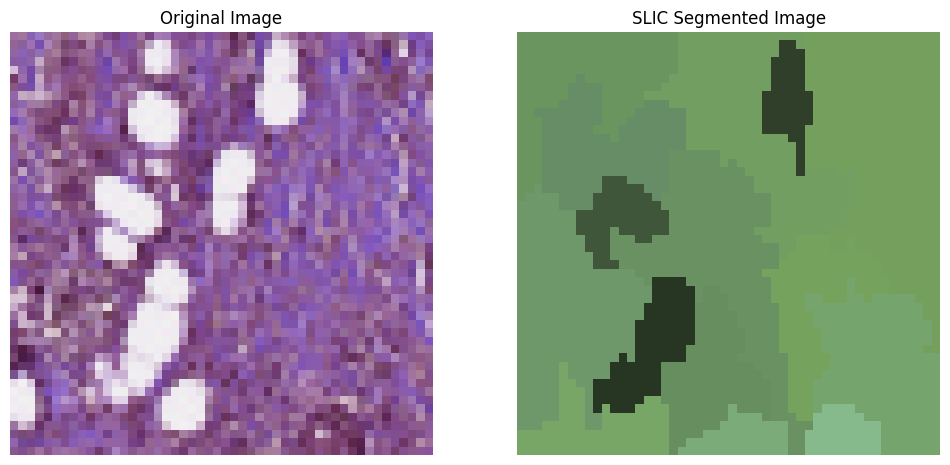

In [46]:
# Display results
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
plt.title('SLIC Segmented Image')
plt.axis('off')

plt.show()

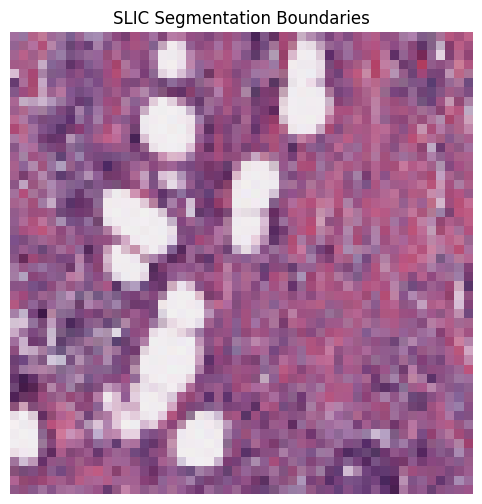

In [26]:
# You can also visualize the segment boundaries
from skimage.segmentation import mark_boundaries

plt.figure(figsize=(12, 6))
plt.imshow(mark_boundaries(image, segments))
plt.title('SLIC Segmentation Boundaries')
plt.axis('off')
plt.show()